In [1]:
import numpy as np

#Transition matrix
P = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.5, 0.2],
    [0.2, 0.3, 0.5]
])

# Initial state probabilities
initial_prob = np.array([1.0, 0.0, 0.0])  # Start in state 0
steps = 10

# Track probabilities over time
probabilities_over_time = [initial_prob]

# Compute probabilities at each step
for _ in range(steps):
    next_prob = np.dot(probabilities_over_time[-1], P)  # Update probabilities
    probabilities_over_time.append(next_prob)

# Convert list to a numpy array for easier analysis
probabilities_over_time = np.array(probabilities_over_time)

# Print results
for step, probs in enumerate(probabilities_over_time):
    print(f"Step {step}: {probs}")


Step 0: [1. 0. 0.]
Step 1: [0.7 0.2 0.1]
Step 2: [0.57 0.27 0.16]
Step 3: [0.512 0.297 0.191]
Step 4: [0.4857 0.3082 0.2061]
Step 5: [0.47367 0.31307 0.21326]
Step 6: [0.468142 0.315247 0.216611]
Step 7: [0.4655957 0.3162352 0.2181691]
Step 8: [0.46442137 0.31668747 0.21889116]
Step 9: [0.46387943 0.31689536 0.21922521]
Step 10: [0.46362925 0.31699113 0.21937962]


In [2]:
from comp import comp
from markovChain import markovChain
from sensor import sensor

Easy Test 1: Markov Chain Object

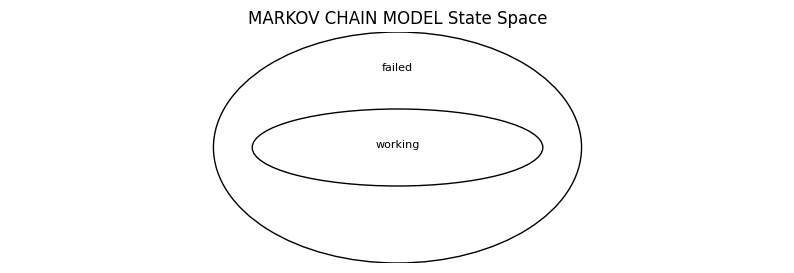

the pos is :  [0, 1]
the state_names is :  ['working', 'failed']
<class 'graphviz.graphs.Digraph'>
here 2


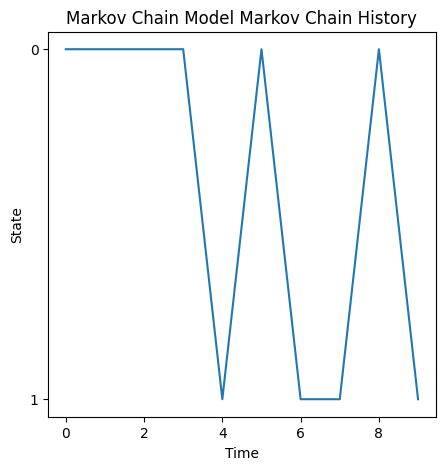

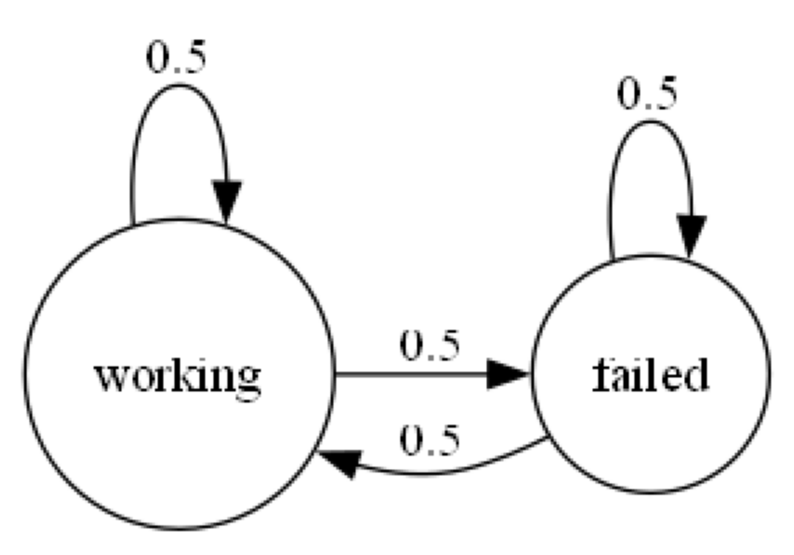

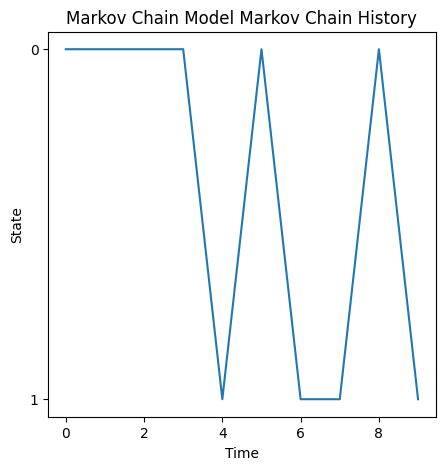

In [3]:
def simulateChain(time_steps = 10):
    
    # initialize a test Markov Chain
    mC = markovChain()
    mC.updateState(time_steps)
    mC.draw()
        
simulateChain()

Easy Test 2: Sensor Object

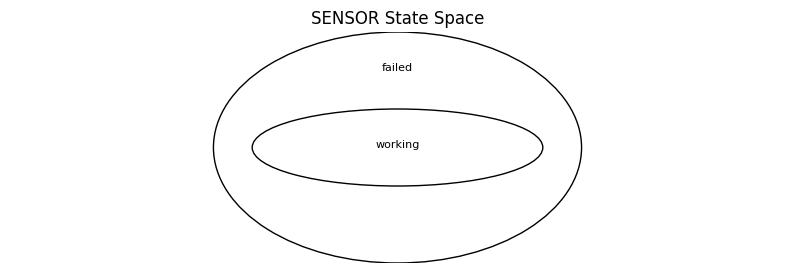

the pos is :  [0, 1]
the state_names is :  ['working', 'failed']
<class 'graphviz.graphs.Digraph'>
here 2


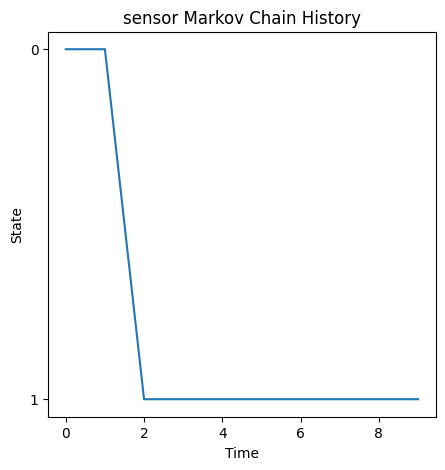

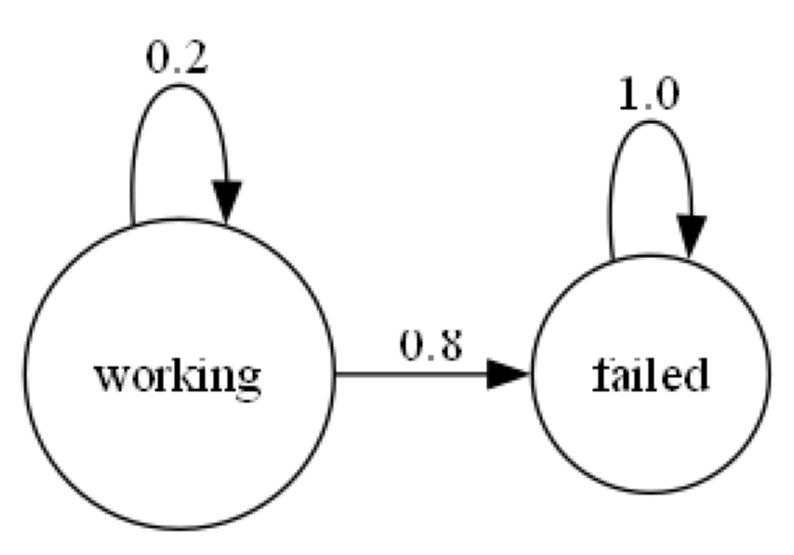

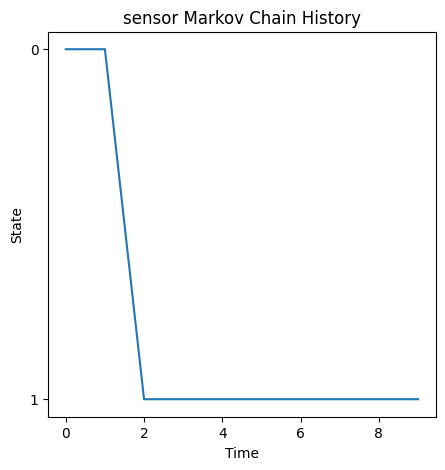

In [4]:
def simulateSensor(time_steps = 10):
    
    # initialize a test sensor
    s1 = sensor(0.2)
    s1.updateState(time_steps)
    s1.markov_model.draw()

simulateSensor()

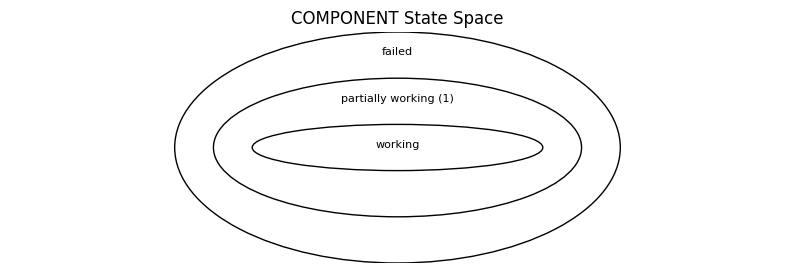

the pos is :  [0, 1, 2]
the state_names is :  ['working', 'partially working (1)', 'failed']
<class 'graphviz.graphs.Digraph'>
here 2
here 2


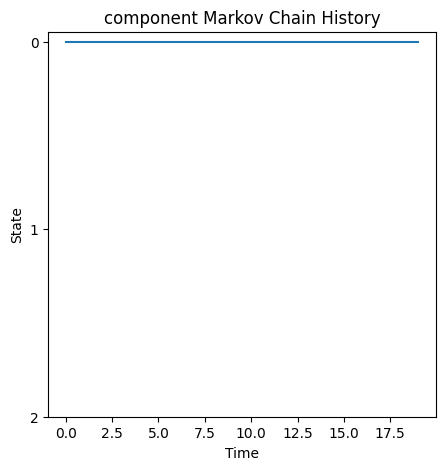

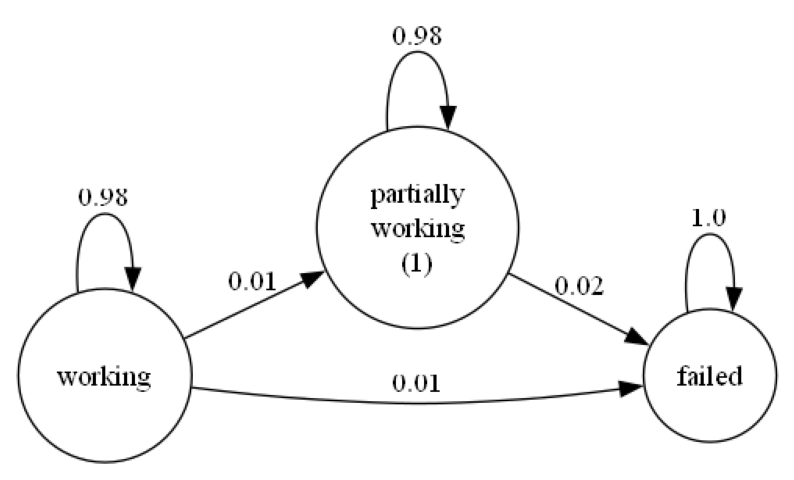

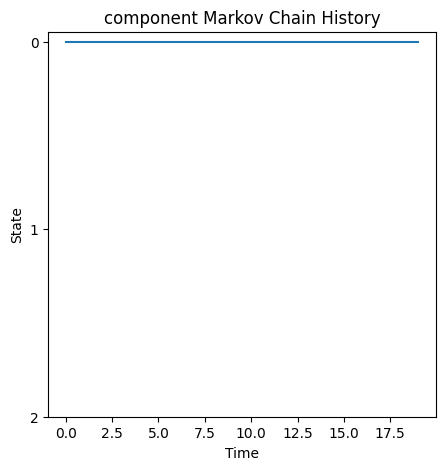

In [5]:
def simulateComp(time_steps = 20):
    
    # initialize a test Markov Chain
    c1 = comp()
    for i in range(time_steps):
        c1.updateState(1)
    c1.markov_model.draw()
        
simulateComp()

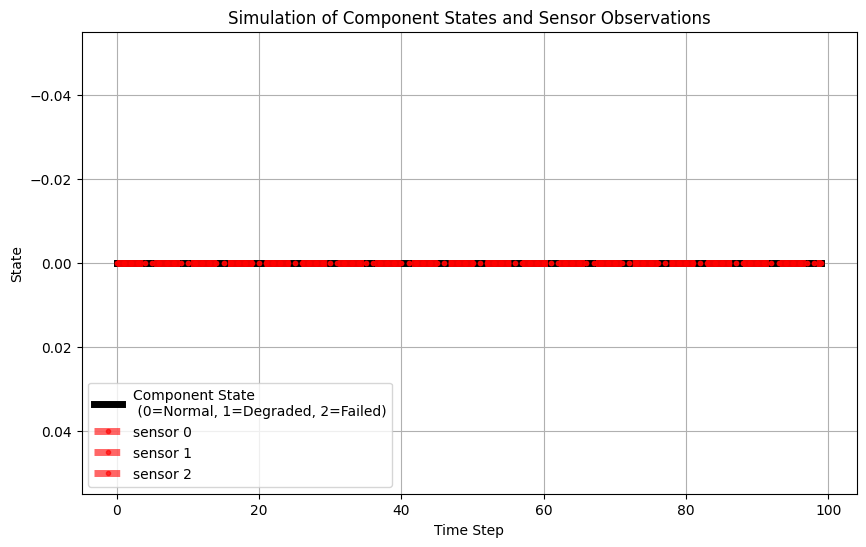

[1, 1, 1]
the pos is :  [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
the state_names is :  ['comp 0 sensors 0', 'comp 0 sensors 1', 'comp 1 sensors 0', 'comp 1 sensors 1', 'comp 2 sensors 0', 'comp 2 sensors 1']
<class 'graphviz.graphs.Digraph'>
here 2
here 2
here 2
here 2
here 2
here 1


AttributeError: 'sensedComp' object has no attribute 'transition_matrix'

In [6]:
from sensedComp import sensedComp

def simulateSensedComp(time_steps = 100):
    
    # initialize a test sensed component
    sc1 = sensedComp()
    sc1.updateState(time_steps)
    sc1.draw(time_steps)
    sc1.reset()                         # will start from the current state again


# iterations = 3
# for i in range(iterations):
simulateSensedComp()

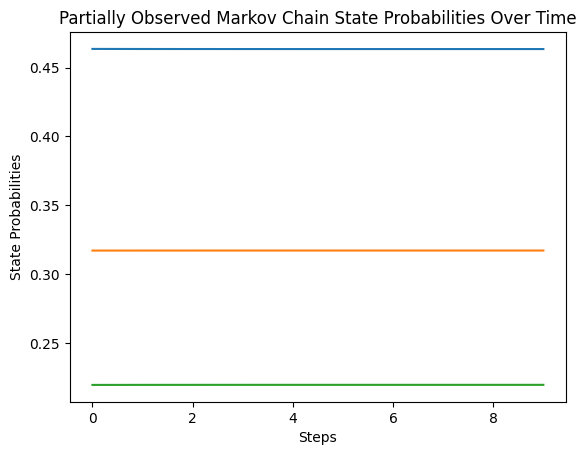

In [7]:
import numpy as np

import matplotlib.pyplot as plt

class MarkovChain:
    def __init__(self, transition_matrix, initial_state):
        self.transition_matrix = transition_matrix
        self.state = initial_state
        self.states_over_time = [initial_state]

    def update_state(self):
        self.state = np.dot(self.state, self.transition_matrix)
        self.states_over_time.append(self.state)

    def simulate(self, steps):
        for _ in range(steps):
            self.update_state()
        return np.array(self.states_over_time)

    def draw(self):
        plt.plot(self.states_over_time)
        plt.xlabel('Steps')
        plt.ylabel('State Probabilities')
        plt.title('Markov Chain State Probabilities Over Time')
        plt.show()

# Component as a 3-state Markov chain
component_transition_matrix = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.5, 0.2],
    [0.2, 0.3, 0.5]
])
component_initial_state = np.array([1.0, 0.0, 0.0])
component_chain = MarkovChain(component_transition_matrix, component_initial_state)

# Sensor as a 2-state Markov chain
sensor_transition_matrix = np.array([
    [0.9, 0.1],
    [0.2, 0.8]
])
sensor_initial_state = np.array([1.0, 0.0])
sensor_chain = MarkovChain(sensor_transition_matrix, sensor_initial_state)

# Simulate both chains
component_states = component_chain.simulate(steps)
sensor_states = sensor_chain.simulate(steps)

# Connect the models as a partially observed Markov chain
# Assuming the component state transition depends on the sensor state
def partially_observed_markov_chain(component_chain, sensor_chain, steps):
    combined_states = []
    for step in range(steps):
        sensor_state = sensor_chain.states_over_time[step]
        if sensor_state[0] > sensor_state[1]:  # Sensor in state 0
            component_chain.update_state()
        else:  # Sensor in state 1
            component_chain.update_state()
        combined_states.append(component_chain.state)
    return np.array(combined_states)

combined_states = partially_observed_markov_chain(component_chain, sensor_chain, steps)

# Plot the results
plt.plot(combined_states)
plt.xlabel('Steps')
plt.ylabel('State Probabilities')
plt.title('Partially Observed Markov Chain State Probabilities Over Time')
plt.show()

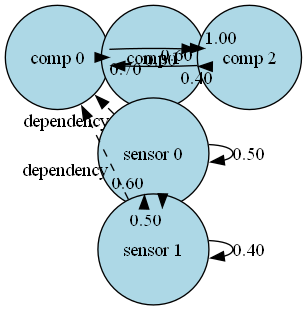

In [ ]:
from graphviz import Digraph

def wrap_label(label, max_length=9):
    """
    Wraps a label into multiple lines if it exceeds max_length.
    """
    if len(label) <= max_length:
        return label
    return '\n'.join(label[i:i + max_length] for i in range(0, len(label), max_length))

def add_nodes(dot, state_names, pos):
    """
    Adds nodes to the Graphviz Digraph with specified attributes and positions.
    """
    for i, state in enumerate(state_names):
        label = wrap_label(state)
        x, y = pos[i]
        dot.node(
            state, 
            label=label, 
            shape='circle', 
            style='filled', 
            fillcolor='lightblue',
            pos=f"{x},{-y}!"  # Flip y-axis for proper positioning
        )

def add_edges(dot, transitions):
    """
    Adds edges to the Graphviz Digraph based on transition probabilities.
    """
    for source, targets in transitions.items():
        for target, prob in targets.items():
            if prob > 0:
                dot.edge(source, target, label=f"{prob:.2f}")

def draw_pomc():
    """
    Draws the partially observable Markov chain (POMC) using Graphviz.
    """
    dot = Digraph(engine='neato', format='png')
    dot.attr(rankdir='LR')

    # Define component states and transitions
    component_states = ['comp 0', 'comp 1', 'comp 2']
    component_pos = [(0, 0), (1, 0), (2, 0)]
    component_transitions_sensor_0 = {
        'comp 0': {'comp 1': 0.7, 'comp 2': 0.3},
        'comp 1': {'comp 2': 1.0},
        'comp 2': {'comp 0': 0.6, 'comp 1': 0.4}
    }
    component_transitions_sensor_1 = {
        'comp 0': {'comp 1': 0.4, 'comp 2': 0.6},
        'comp 1': {'comp 2': 1.0},
        'comp 2': {'comp 0': 0.3, 'comp 1': 0.7}
    }

    # Define sensor states and transitions
    sensor_states = ['sensor 0', 'sensor 1']
    sensor_pos = [(1, 1), (1, 2)]
    sensor_transitions = {
        'sensor 0': {'sensor 1': 0.5, 'sensor 0': 0.5},
        'sensor 1': {'sensor 0': 0.6, 'sensor 1': 0.4}
    }

    # Add component and sensor nodes
    add_nodes(dot, component_states, component_pos)
    add_nodes(dot, sensor_states, sensor_pos)

    # Add component transitions (dependent on sensor states)
    add_edges(dot, component_transitions_sensor_0)
    add_edges(dot, sensor_transitions)

    # Label the dependency for POMC
    dot.edge('sensor 0', 'comp 0', style='dashed', label='dependency')
    dot.edge('sensor 1', 'comp 0', style='dashed', label='dependency')


    plt.figure(figsize=(10, 10))
    plt.imshow(plt.imread('pomc_graph.png'))
    plt.axis('off')
    plt.show()


    # # Render and return the result
    # dot.render('pomc_graph', cleanup=True)
    # from IPython.display import Image
    # return Image(filename='pomc_graph.png')

# Draw and display the POMC
draw_pomc()